In [3]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


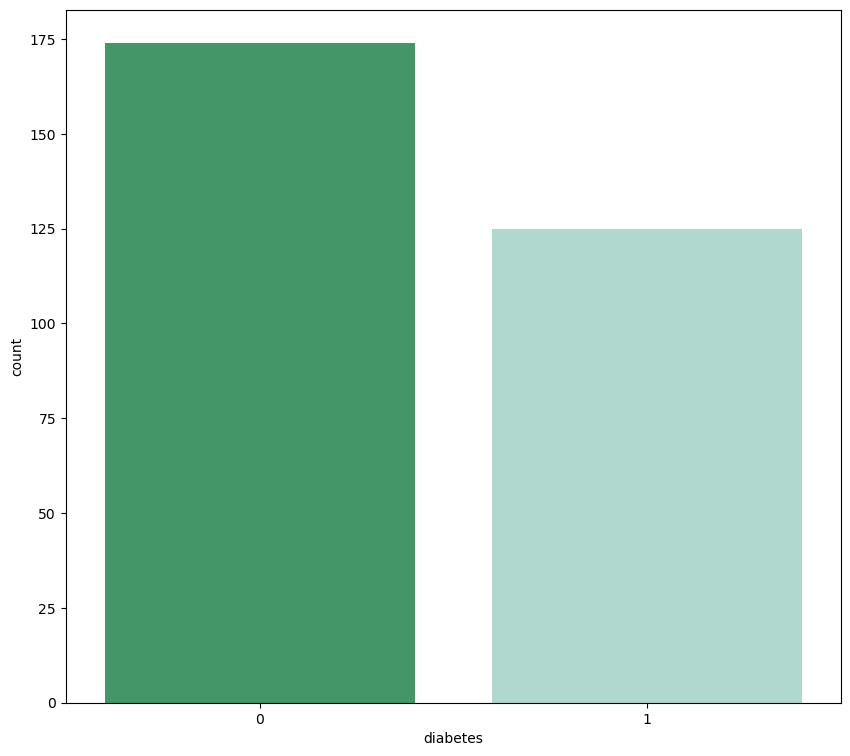

In [12]:
plt.figure(figsize=(10, 9))
sn.countplot(x='diabetes', data=df,palette="BuGn_r")
plt.show()

In [20]:
X = np.asarray(df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']])
y = np.asarray(df['DEATH_EVENT'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)
 
 
print('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (209, 12) (209,)
Test set: (90, 12) (90,)


In [21]:
from sklearn.linear_model import LogisticRegression
 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_test, y_pred)

from sklearn.metrics import jaccard_score
 
print('')
print('Accuracy of the model in jaccard similarity score is = ', 
      jaccard_score(y_test, y_pred))

[1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]

Accuracy of the model in jaccard similarity score is =  0.5


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


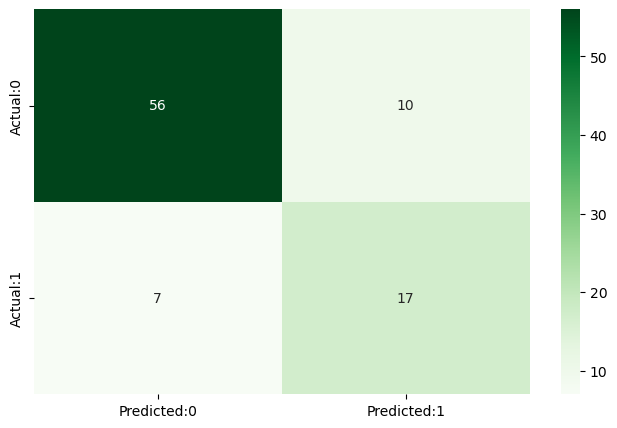

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        66
           1       0.63      0.71      0.67        24

    accuracy                           0.81        90
   macro avg       0.76      0.78      0.77        90
weighted avg       0.82      0.81      0.81        90



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
 
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
 
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))